In [146]:
import pandas as pd 
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from historical_data_weather import data
import seaborn as sns
import numpy as np

In [16]:
tempmax_data = data['days'][0]['tempmax']
print(tempmax_data)

tempmax_data_past_30 = [day['tempmax'] for day in data['days']]
tempmax_data_past_30 = pd.DataFrame({'TemperatureMax' : tempmax_data_past_30})
print(tempmax_data_past_30)

tempmin_data = data['days'][0]['tempmin']
print(tempmin_data)

tempmin_data_past_30 = [day['tempmin'] for day in data['days']]
tempmin_data_past_30 = pd.DataFrame({'TemperatureMin' : tempmin_data_past_30})
print(tempmin_data_past_30)

humidity_data = data['days'][0]['humidity']
print(humidity_data)

humidity_data_past_30 = [day['humidity'] for day in data['days']]
humidity_data_past_30 = pd.DataFrame({'Humidity': humidity_data_past_30})
print(humidity_data_past_30)

pressure_data = data['days'][0]['pressure']
print(pressure_data)

pressure_data_past_30 = [day['pressure'] for day in data['days']]
pressure_data_past_30 = pd.DataFrame({'Pressure': pressure_data_past_30})
print(pressure_data_past_30)

uv_index = data['days'][0]['uvindex']
print(uv_index)

uv_index_past_30 = [day['uvindex'] for day in data['days']]
uv_index_past_30 = pd.DataFrame({'UV_Index' : uv_index_past_30})
print(uv_index_past_30)

date = [day['datetime'] for day in data['days']]
date = pd.DataFrame({'Date': date})
print(date)

23.4
    TemperatureMax
0             23.4
1             21.1
2             21.1
3             20.0
4             20.5
5             22.9
6             25.5
7             24.3
8             23.4
9             23.0
10            20.4
11            20.2
12            21.4
13            17.2
14            23.4
15            22.8
16            26.9
17            20.4
18            22.0
19            21.8
20            26.6
21            30.2
22            20.1
23            19.3
24            19.6
25            23.6
26            26.0
27            25.0
28            25.0
29            28.0
30            29.0
14.7
    TemperatureMin
0             14.7
1             16.6
2             15.0
3             12.0
4             10.6
5             14.0
6             16.0
7             17.4
8             17.0
9             17.0
10            13.7
11            11.1
12            14.6
13            12.5
14            15.1
15            16.4
16            14.7
17            12.6
18            13.6
19

In [27]:
historical_data = tempmax_data_past_30.join([tempmin_data_past_30, humidity_data_past_30, pressure_data_past_30, uv_index_past_30, date])
historical_data.set_index('Date')
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TemperatureMax  31 non-null     float64
 1   TemperatureMin  31 non-null     float64
 2   Humidity        31 non-null     float64
 3   Pressure        31 non-null     float64
 4   UV_Index        31 non-null     float64
 5   Date            31 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [32]:
historical_data['Date'] = historical_data['Date'].astype({'Date': 'datetime64[ns]'})
historical_data.set_index('Date')

,TemperatureMax,TemperatureMin,Humidity,Pressure,UV_Index
Date,,,,,
2024-08-09,23.4,14.7,78.5,1013.6,7.0
2024-08-10,21.1,16.6,74.1,1014.6,5.0
2024-08-11,21.1,15.0,69.6,1016.4,6.0
2024-08-12,20.0,12.0,68.4,1015.7,6.0
2024-08-13,20.5,10.6,78.3,1017.8,7.0
2024-08-14,22.9,14.0,76.0,1017.9,7.0
2024-08-15,25.5,16.0,71.5,1015.2,5.0
2024-08-16,24.3,17.4,84.3,1014.0,6.0
2024-08-17,23.4,17.0,84.6,1012.3,5.0


<Axes: >

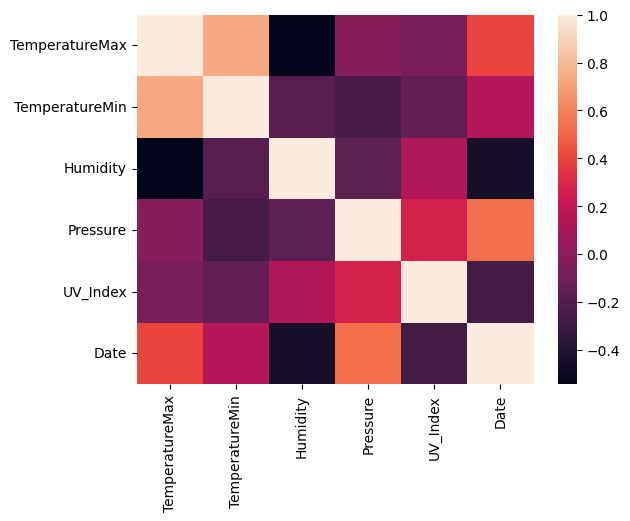

In [127]:
sns.heatmap(historical_data.corr())

In [94]:
#Lineplot tempmax and tempmin

fig = go.Figure()

fig.add_trace(go.Scatter(x=historical_data['Date'], y=historical_data['TemperatureMin'], name = 'Temp Min', mode='lines+markers', text=historical_data['TemperatureMin'], marker=dict(size=10)))
fig.add_trace(go.Scatter(x=historical_data['Date'], y=historical_data['TemperatureMax'], name = 'Temp Max',mode='lines+markers', text=historical_data['TemperatureMax'],marker=dict(size=10)))

fig.update_traces(textfont=dict(size=12))
fig.update_traces(textposition = 'bottom center')
fig.update_layout(template='simple_white')
fig.update_layout(width=1300, height=800)
fig.show()

In [107]:

fig = px.line(historical_data, x='Date', y='UV_Index', template='simple_white')
fig.update_yaxes(range=[0, historical_data['UV_Index'].max()])
fig.update_traces(line_color='gold', fill='tozeroy')
fig.show()

In [116]:
fig = px.line(historical_data, x='Date', y='Humidity', template='simple_white')
fig.update_yaxes(range=[0, historical_data['Humidity'].max()])
fig.update_traces(line_color='yellowgreen', fill='tozeroy')
fig.show()

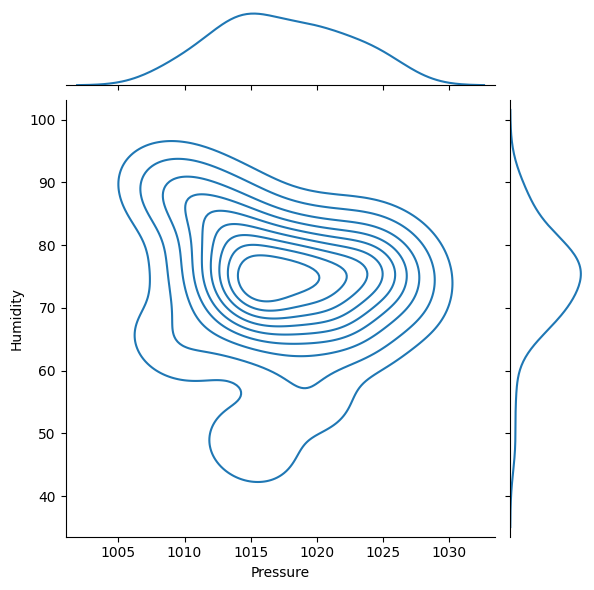

In [126]:
sns.jointplot(data=historical_data, x='Pressure', y='Humidity', kind='kde')
plt.show()